In [1]:
from riken.rnn.rnn_keras_with_psiblast import *
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from riken.viz_utils import visualize_attention, to_2d_array, visualize_attention_2d
from riken.protein_io.prot_features import idx_to_char
from keras.models import Model


RANDOM_STATE = 42
MAXLEN = 500
DATA_PATH = "/home/pierre/riken/data/riken_data/complete_from_xlsx.tsv"
KEY_TO_PREDICT = "is_allergenic"
LOG_DIR = "/home/pierre/riken/riken/rnn/logs/riken_data_psiblast/logs_riken_data_psiblast_1_transfer"
TRANSFER_PATH = None
GROUPS = "species"
SPLITTER = data_op.group_shuffle_indices
PSSM_FORMAT_FILE = "/home/pierre/psiblast/riken_data/{}_pssm.txt"

Using TensorFlow backend.


In [2]:
df = pd.read_csv(DATA_PATH, sep='\t').dropna()
df = df.loc[df.seq_len >= 50, :]

try:
    df.loc[:, 'sequences'] = df.sequences_x
except AttributeError:
    pass

sequences, y = df['sequences'].values, df[KEY_TO_PREDICT]
y = pd.get_dummies(y).values
X = pad_sequences([[prot_features.safe_char_to_idx(char) for char in sequence]
                   for sequence in sequences], maxlen=MAXLEN)
groups = None if GROUPS is None else df[GROUPS].values
indices = df.index.values

# Get train test indices before getting all features (potentially less
# FOR CONSISTENCY PURPOSES
train_inds, test_inds = SPLITTER(sequences, y, groups)

X, pssm, y, old_to_new_indices = get_all_features(X, y, indices, pssm_format_fi=PSSM_FORMAT_FILE)

def convert_indices(old_to_new_dic, indices):
    res_ind = []
    for ind in indices:
        if ind in old_to_new_dic:
            res_ind.append(old_to_new_dic[ind])
    return np.array(res_ind)

train_inds = convert_indices(old_to_new_indices, train_inds)
test_inds = convert_indices(old_to_new_indices, test_inds)
print(np.intersect1d(train_inds, test_inds))
assert len(np.intersect1d(train_inds, test_inds)) == 0
print(train_inds.shape, test_inds.shape)
Xtrain, Xtest, ytrain, ytest = X[train_inds], X[test_inds], y[train_inds], y[test_inds]
pssm_train, pssm_test = pssm[train_inds], pssm[test_inds]

print(pssm_train[0])
print(pssm_test[0])


  0%|          | 0/12466 [00:00<?, ?it/s]/home/pierre/riken/riken/rnn/rnn_keras_with_psiblast.py:42: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  pssm = pd.read_csv(pssm_path, sep=' ', skiprows=2, skipfooter=6, skipinitialspace=True)\
  3%|▎         | 367/12466 [00:07<03:55, 51.33it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/397_pssm.txt'
Error!


  4%|▍         | 546/12466 [00:09<03:37, 54.77it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/577_pssm.txt'
Error!


  4%|▍         | 559/12466 [00:10<03:39, 54.28it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/594_pssm.txt'
Error!


  5%|▌         | 636/12466 [00:11<03:37, 54.44it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/669_pssm.txt'
Error!


  6%|▌         | 776/12466 [00:14<03:31, 55.37it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/809_pssm.txt'
Error!


  6%|▋         | 798/12466 [00:14<03:29, 55.60it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/833_pssm.txt'
Error!


  8%|▊         | 938/12466 [00:16<03:24, 56.24it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/972_pssm.txt'
Error!


  9%|▉         | 1122/12466 [00:19<03:19, 56.88it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1168_pssm.txt'
Error!


 10%|█         | 1284/12466 [00:22<03:19, 55.93it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1346_pssm.txt'
Error!


 11%|█▏        | 1429/12466 [00:25<03:14, 56.60it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1499_pssm.txt'
Error!


 12%|█▏        | 1483/12466 [00:26<03:16, 56.00it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1547_pssm.txt'
Error!


 12%|█▏        | 1553/12466 [00:28<03:17, 55.16it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1617_pssm.txt'
Error!


 13%|█▎        | 1567/12466 [00:28<03:17, 55.20it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1631_pssm.txt'
Error!


 14%|█▎        | 1694/12466 [00:30<03:13, 55.76it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1758_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1759_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1760_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1768_pssm.txt'
Error!


 14%|█▍        | 1776/12466 [00:31<03:10, 56.17it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1839_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1840_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1841_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1842_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1843_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1844_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1855_pssm.txt'
Error!


 15%|█▌        | 1873/12466 [00:33<03:07, 56.58it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1950_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1960_pssm.txt'
Error!


 15%|█▌        | 1895/12466 [00:33<03:06, 56.61it/s]

[Errno 2] No such file or directory: '/home/pierre/psiblast/riken_data/1972_pssm.txt'
Error!


100%|██████████| 12466/12466 [05:02<00:00, 41.25it/s]


(12439, 500)
(12439, 2)
(12439, 500, 42)
12439 examples
[]
(10814,) (1248,)
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 3.   -4.   -4.   ...  0.    1.62  0.36]
 [-2.   -1.   -2.   ... 15.    0.33  0.16]
 [-3.   -4.   -5.   ... 40.    0.85  0.28]]
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [-1.   -2.    2.   ...  0.    0.55  0.14]
 [-2.   -1.    1.   ...  0.    0.98  0.23]
 [-2.   -2.   -3.   ...  0.    1.9   0.2 ]]


In [3]:
from keras.models import load_model

mdl = load_model('logs/riken_data_psiblast/logs_riken_data_psiblast_1_NO_transfer/weights.12-0.37.hdf5')
ypred = mdl.predict([Xtest, pssm_test])

test_df = df.iloc[test_inds]
test_df.loc[:, 'y_pred'] = ypred[:, 1]

/home/pierre/.conda/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/pierre/.conda/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
roc_auc_score(test_df.is_allergenic, test_df.y_pred)

0.9315799764273047

# Visualize attention

In [5]:
attention = mdl.get_layer(name='activation_1').output
attention_model = Model(inputs=mdl.inputs, outputs=attention)

In [13]:
from riken.word2vec.classification_tools import roc_score

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc97c7f3cf8>)

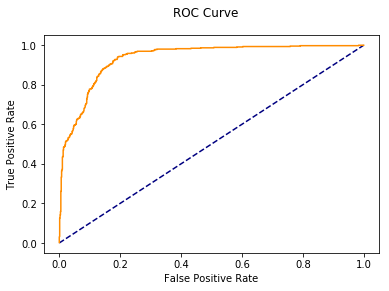

In [14]:
roc_score(ytest[:, 1], ypred[:, 1])

In [28]:
len(ypred[ytest[:, 1]==1, 1])

460

In [25]:
np.argsort(-ypred[ytest[:, 1]==1, 1])

array([167, 138, 152,  26, 386, 145, 397, 279, 160,  90, 392, 105, 357,
       116,   7, 147, 115, 113, 103,  78, 111, 399, 114, 107,  80,  74,
       142, 112, 128, 106,  79, 104, 102, 441, 294,  77, 292, 293, 335,
       336, 295, 161, 400, 334, 444, 358, 425, 202, 408, 420, 322, 289,
       421,  97, 360, 129, 361, 296, 174,  46, 331,  94, 389, 391, 229,
       316,  76, 251, 394, 117, 193, 406, 146,  44, 418, 324, 278, 182,
       183, 235, 242, 186, 218, 417, 163, 387, 426, 364, 224, 416, 173,
       254,  40,  45, 419, 348, 329,  70, 298, 248, 299, 267, 446, 286,
       283, 154,  69, 230, 285, 398, 263, 189, 300, 246, 306,  92,  82,
       268, 284, 141, 370, 123, 287, 347, 188, 228, 156, 385,  75, 377,
       250, 454, 266, 428,   0,  43, 297, 122, 227, 262, 126, 359, 390,
       181, 180, 178, 177, 308, 217,  73, 291, 455, 405, 150, 259, 277,
       165, 179, 350, 159, 166, 388, 192, 276,  81, 310,  83,  47, 345,
        36, 349, 338, 209, 260, 365, 121, 341,  86, 340, 339, 43

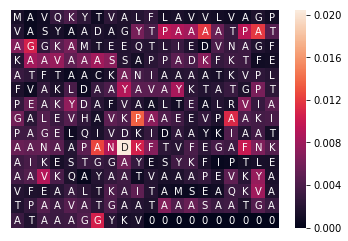

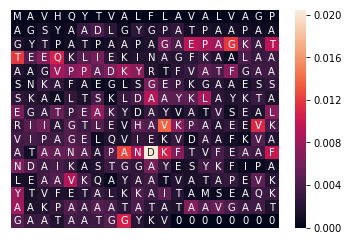

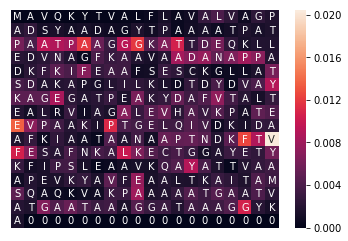

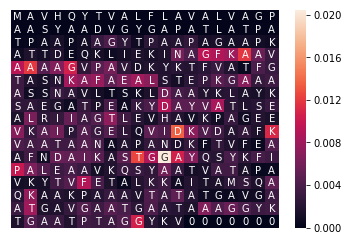

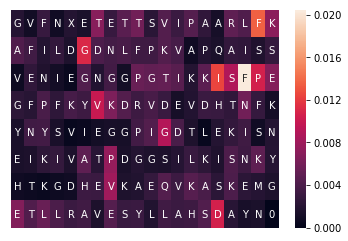

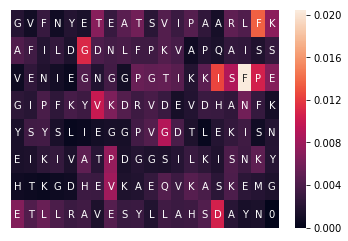

In [29]:
idx = [167, 138, 152,  26, 386, 145]
seqs, pssms = Xtest[idx], pssm_test[idx]
atts = attention_model.predict([seqs, pssms])
seqs_str = [[idx_to_char[idce] for idce in seq] for seq in seqs]

for indice in range(len(idx)):
    seq = seqs_str[indice]
    first_non_null = [ind for ind in range(len(seq)) if seq[ind]!=''][0]
    seq = seq[first_non_null:]
    att = atts[0][first_non_null:]
    assert(len(att)==len(seq))
    fig = plt.figure()
    ax = visualize_attention_2d(seq, att, ncols=20)
    fig.savefig('{}_attention.png'.format(indice))

# Experiments

In [14]:
def roc_auc(df):
    return roc_auc_score(df.is_allergenic, df.y_pred)

is_long = test_df.seq_len >= 500
test_df.groupby(is_long).apply(roc_auc)

seq_len
False    0.936191
True     0.897737
dtype: float64

In [14]:
is_long.sum()

193

In [15]:
test_df[is_long].seq_len.describe()

count     193.000000
mean      719.119171
std       345.191238
min       500.000000
25%       527.000000
50%       608.000000
75%       796.000000
max      3099.000000
Name: seq_len, dtype: float64